# Stellar Evolution Analysis: Simulating low and high mass stars

## Install MESA: 
Installation guide: https://docs.mesastar.org/en/latest/installation.html#installing-mesa

Linux Environment for Windows (WSL): https://learn.microsoft.com/en-us/windows/wsl/install

In PowerShell (Windows): 
    
```
wsl --install
```
    
Containerized MESA for Windows (Docker): https://github.com/evbauer/MESA-Docker

## Modeling
2 solar masses for the low mass star and 15 solar masses for the high mass were chosen for this project for faster simulations. Additionally, they were chosen so as to stay close to the solar reference but not too close that would make it difficult to identify the differences. 
On the main sequence, it is expected that the high mass star will burn all of its Hydrogen faster than the low mass star, while also creating Helium at the respective rates. The luminosity and temperature of the high mass star will be higher than the low mass star on the main sequence, positioning it higher on the HRD. Past the main sequence, the low mass star is expected to quickly cool down collapsing into a white dwarf or a blue dwarf if it gets hot enough on the MS, while the high mass star might continue fusing Carbon and Oxygen to produce heavier elements like more Oxygen or Iron. 

### Install some official MESA utility libraries which will make life a lot easier
Uncomment these if the libaries are not installed. 

In [1]:
# !git clone https://github.com/rjfarmer/mesaplot.git
# !git clone https://github.com/wmwolf/py_mesa_reader.git
# !cd mesaplot-master/
# !pip3 install .
# !cd ../py_mesa_reader-master
# !pip3 install .

### Import Libraries for parsing and visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as mr
import seaborn as sns
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
%matplotlib inline

### Create simulation environment
Uncomment these to create the simulation environment

In [3]:
# !mkdir high_mass
# !mkdir low_mass
# !cp -r $MESA_DIR/star/test_suite/* high_mass/
# !cp -r $MESA_DIR/star/test_suite/* low_mass/
# !vi high_mass/inlist_project # update simulation parameters
# !vi history_columns.list # uncomment radius listing
# !cd high_mass
# !./mk # build and wrap fortran, C and python files
# !./rn # Wait for simulation end
# !mkdir -r ../analysis/high_mass ../analysis/low_mass
# !cp LOGS/* ../analysis/high_mass/
# !cd ../low_mass/
# !vi low_mass/inlist_project # update simulation parameters
# !vi history_columns.list # uncomment radius listing
# !cd low_mass
# !./mk # build and wrap fortran, C and python files
# !./rn # Wait for simulation end
# !mkdir -r ../analysis/high_mass ../analysis/low_mass
# !cp LOGS/* ../analysis/high_mass/

### Define log locations and retrieve history files
Change directory structure if you need to

In [4]:
highMassRoot = 'high_mass'
lowMassRoot = 'low_mass'
hist_high_mass = mr.MesaData(highMassRoot + '/history.data')
hist_low_mass = mr.MesaData(lowMassRoot + '/history.data')
low_mass_center_h1 = hist_low_mass.center_h1
high_mass_center_h1 = hist_high_mass.center_h1
low_mass_center_h1
high_mass_center_h1

array([0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.69999992, 0.69999663, 0.69988375,
       0.69969729, 0.69920628, 0.69796391, 0.69472793, 0.68669952,
       0.66614564, 0.61447418, 0.56037627, 0.50759463, 0.45483319,
       0.401952  , 0.34914926, 0.29625883, 0.24359101, 0.19083182,
       0.13797451, 0.0851881 , 0.03826884, 0.01497791, 0.00591344,
       0.00235926, 0.00096884])

### Calculate central hydrogen mass fraction to define the start of Zero Age Main Sequence (ZAMS)

In [5]:
CENTRAL_H1_MASS_FRACTION = 0.7 * 0.99

def find_zams(center_h1_list):
    res = next(x for x, val in enumerate(center_h1_list)
                                  if val < CENTRAL_H1_MASS_FRACTION)
    return res - 1

low_mass_zams_idx = find_zams(low_mass_center_h1)
high_mass_zams_idx = find_zams(high_mass_center_h1)

### Slice the mass fraction data to only have information on the Main Sequence (MS)

In [6]:
low_mass_center_h1 = low_mass_center_h1[low_mass_zams_idx:]
high_mass_center_h1 = high_mass_center_h1[high_mass_zams_idx:]
print(low_mass_center_h1)
print(high_mass_center_h1)

[0.69475616 0.68717126 0.66730616 0.61808939 0.56432863 0.5118072
 0.45896601 0.40610354 0.35336079 0.30029622 0.24736929 0.19468731
 0.14147758 0.08811231 0.03948923 0.01484218 0.00555575 0.00215921
 0.0009002 ]
[0.69472793 0.68669952 0.66614564 0.61447418 0.56037627 0.50759463
 0.45483319 0.401952   0.34914926 0.29625883 0.24359101 0.19083182
 0.13797451 0.0851881  0.03826884 0.01497791 0.00591344 0.00235926
 0.00096884]


### Get model numbers from the history file

In [7]:
hist_low_mass.model_number
hist_high_mass.model_number

array([  1,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305])

### Get index of the model number corresponding to ZAMS

In [8]:
modelNumZAMS_LowMass = hist_low_mass.model_number[low_mass_zams_idx]
modelNumZAMS_HighMass = hist_high_mass.model_number[high_mass_zams_idx]
print(modelNumZAMS_LowMass)
print(modelNumZAMS_HighMass)

200
215


### Get appropriate profile index for the ZAMS model number

In [9]:
import mesaPlot as mp
m = mp.MESA()
m.log_fold = lowMassRoot
low_mass_zams = m.loadProfile(num=modelNumZAMS_LowMass, mode='nearest')
m.log_fold = highMassRoot
high_mass_zams = m.loadProfile(num=modelNumZAMS_HighMass, mode='nearest')

low_mass/profile5.data
high_mass/profile5.data


## Stellar Histories 
### Plot Hertzsprung–Russell diagram (HRD) from history file output of both stars on logarithmic scales

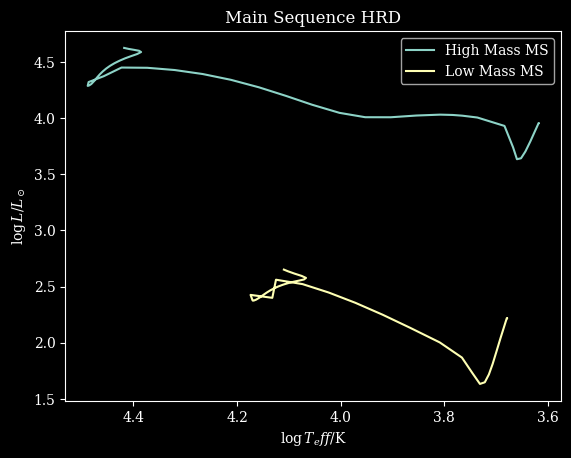

In [10]:
# print(plt.style.available)
plt.style.use('dark_background')
plt.plot(hist_high_mass.log_Teff, hist_high_mass.log_L, label = 'High Mass MS')
# low_mass_profile = l.profile_data(profile_number=5)
plt.plot(hist_low_mass.log_Teff, hist_low_mass.log_L, label = 'Low Mass MS')
plt.legend()
plt.title('Main Sequence HRD')
# invert the x-axis
plt.gca().invert_xaxis()
# set axis labels
plt.xlabel('$\log T_eff /\mathrm{K}$')
plt.ylabel('$\log L/L_\odot$')
plt.show()

The HRDs for both the stars are far apart. This is because the high mass star burns hydrogen faster than the low mass star so they're more luminous and hotter placing their MS higher in the HRD. 

### Plot the central mass fractions of hydrogen, helium, carbon, and oxygen as a function of time for the two stars to see the composition of these elements over time

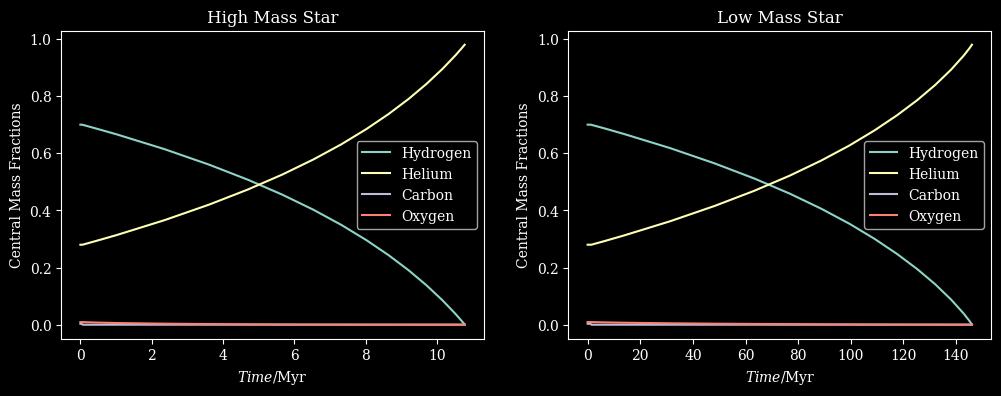

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.center_h1, label = 'Hydrogen')
ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.center_he4, label = 'Helium')
ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.center_c12, label = 'Carbon')
ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.center_o16, label = 'Oxygen')
ax[0].title.set_text('High Mass Star')
ax[0].set_xlabel('$Time /\mathrm{Myr}$')
ax[0].set_ylabel('Central Mass Fractions')
ax[0].legend()

ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.center_h1, label = 'Hydrogen')
ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.center_he4, label = 'Helium')
ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.center_c12, label = 'Carbon')
ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.center_o16, label = 'Oxygen')
ax[1].title.set_text('Low Mass Star')
ax[1].set_xlabel('$Time /\mathrm{Myr}$')
ax[1].set_ylabel('Central Mass Fractions')
ax[1].legend()

The central mass fractions of the elements in the plots above have similar distribution and curves but at different time scales. As expected, hydrogen burns faster in the high mass star and runs out in only 10 million years (Myr). On the other hand, hydrogen takes about 150 Myr to run out. The plots will be different after the Terminal Age Main Sequence (TAMS) because the created Helium will further fuse into heavier elements changing the curve for helium and adding the curves for those fused elements. In the low mass star, the core will simply cool down and turn into a blue or a white dwarf which aren't the necessary conditions for further fusion. 

### Plot the log of central Temperature (in K) of the star as a function of the its age (time)

Text(0, 0.5, '$LogT_{Center}/\\mathrm{K}$')

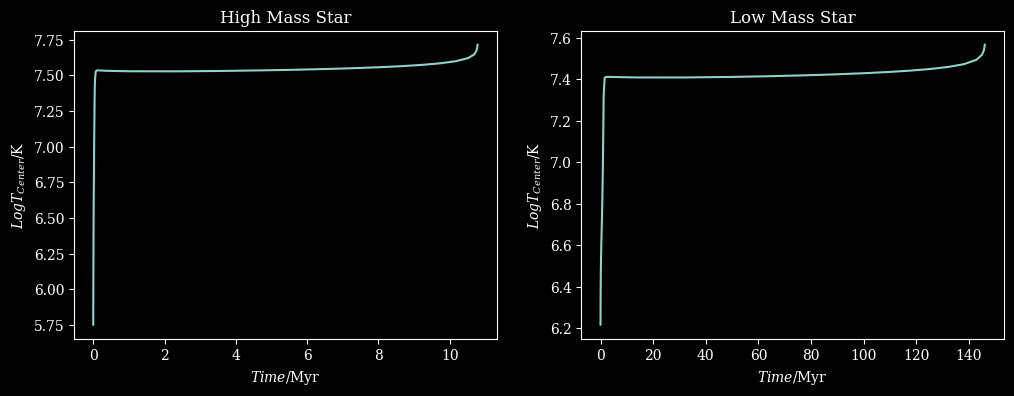

In [12]:
# log_center_T
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.log_center_T)
ax[0].title.set_text('High Mass Star')
ax[0].set_xlabel('$Time /\mathrm{Myr}$')
ax[0].set_ylabel('$LogT_{Center}/\mathrm{K}$')

ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.log_center_T)
ax[1].title.set_text('Low Mass Star')
ax[1].set_xlabel('$Time /\mathrm{Myr}$')
ax[1].set_ylabel('$LogT_{Center}/\mathrm{K}$')

While the curves for the central temperatures over time may look similar, they have different temperatures at different stages of their MS lifetime. Since in the high mass star fusion happens at a significantly faster rate than the low mass star, it reaches antilog(7.5) K which is about 31 Million K in about a hundred thousand (100,000) years, while it takes about 140 Myr for the low mass to reach a similar central temperature which has a lower fusion rate. This is also dependent on the mass of the star. So at any given point, the temperature gradient is different for both the stars, meaning they're at different central temperatures. 

### Plot the log of surface temperature (in K) as a function of time

Text(0, 0.5, '$LogT_{Surf}/\\mathrm{K}$')

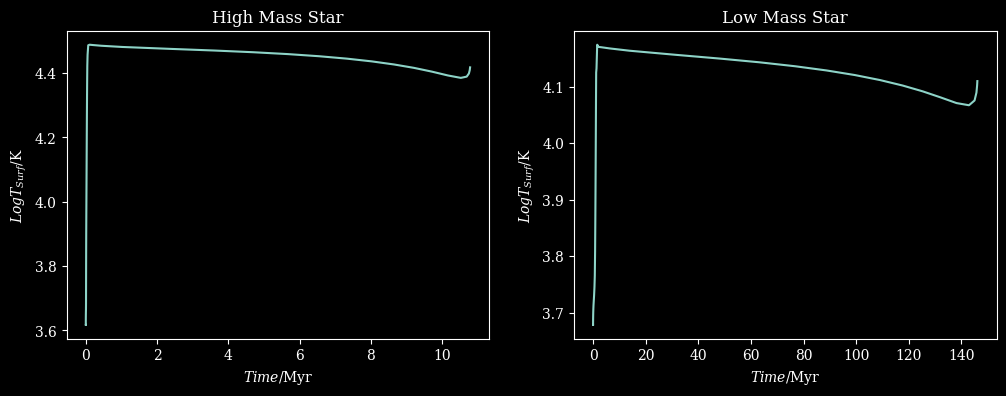

In [13]:
# log_Teff
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.log_Teff)
ax[0].title.set_text('High Mass Star')
ax[0].set_xlabel('$Time /\mathrm{Myr}$')
ax[0].set_ylabel('$LogT_{Surf}/\mathrm{K}$')

ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.log_Teff)
ax[1].title.set_text('Low Mass Star')
ax[1].set_xlabel('$Time /\mathrm{Myr}$')
ax[1].set_ylabel('$LogT_{Surf}/\mathrm{K}$')

Again, the curves for the surface temperature over time might look similar for both the stars, they're different at all times. As explained before, the more massive star reaches higher surface temperatures faster than the less massive star. This is due to the different rates of fusion at the core. However, the plots are different from central temperatures. The surface temperatures for both the stars gradually drop over time while the central temperatures remain stable for a while before slowly increasing again. This is because, at the surface, the heat is radiated out (blackbody radiation) lowering its temperature making it retain a lower temperature than the core. However, central temperatures are complicated which is explained by the nature of their early evolution. During the protostellar (early stage of star formation) stage, low mass stars form by the gravitational collapse of rotating density enhancements in molecular clouds drastically (seen by the steep curve at the beginning) raising the temperature until thermonuclear fusion happens at which point this collapse gradually comes to a halt as the outward thermal pressure balances the gravitational forces keeping the temperature stable for a while. 

### Plot the log of radius of the stars as a function of time

Text(0, 0.5, '$\\log R/R_\\odot$')

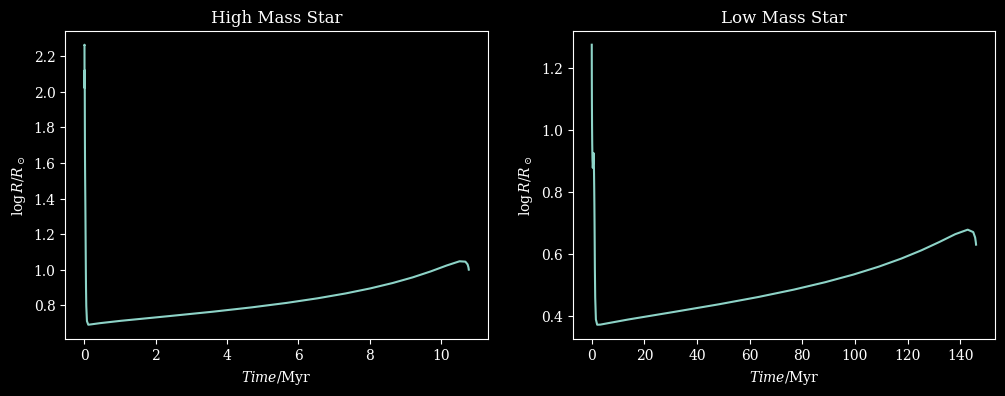

In [14]:
# Radius
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax[0].plot((hist_high_mass.star_age/1e6), np.log10(hist_high_mass.radius))
ax[0].title.set_text('High Mass Star')
ax[0].set_xlabel('$Time /\mathrm{Myr}$')
ax[0].set_ylabel('$\log R/R_\odot$')

ax[1].plot((hist_low_mass.star_age/1e6), np.log10(hist_low_mass.radius))
ax[1].title.set_text('Low Mass Star')
ax[1].set_xlabel('$Time /\mathrm{Myr}$')
ax[1].set_ylabel('$\log R/R_\odot$')

The slopes for the radius are similar for both the stars. However the high mass star grew the most in radius, which is pretty self-intuitive. 

### Plot the log of central density of the stars as a function of time

Text(0, 0.5, '$Log\\rho/\\mathrm{g/cm^3}$')

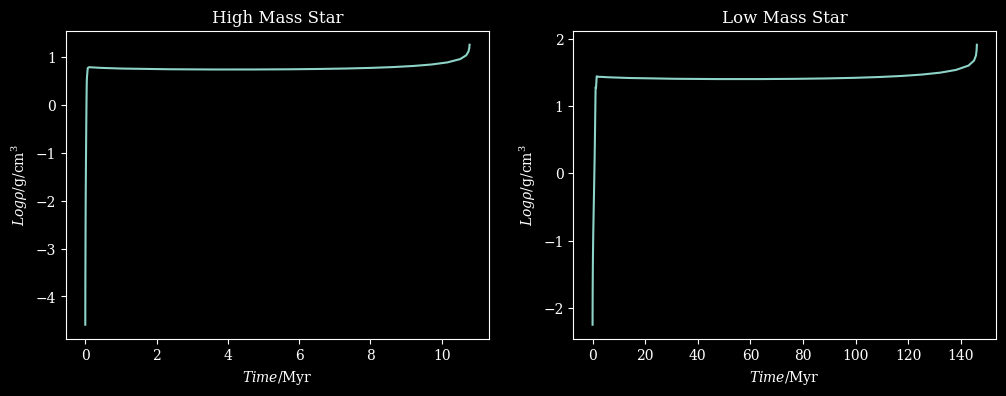

In [15]:
# Central Density

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.log_center_Rho)
ax[0].title.set_text('High Mass Star')
ax[0].set_xlabel('$Time /\mathrm{Myr}$')
ax[0].set_ylabel(r"$Log\rho/\mathrm{g/cm^3}$")

ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.log_center_Rho)
ax[1].title.set_text('Low Mass Star')
ax[1].set_xlabel('$Time /\mathrm{Myr}$')
ax[1].set_ylabel(r"$Log\rho/\mathrm{g/cm^3}$")

The central densities of both the stars are different. The high mass star started with a lower central density while the low mass star started with a higher central density. This is because the higher mass star doesn't need to go through as much gravitational contraction as the lower mass star to reach the necessary temperature for MS making the central density in high mass star lower than the low mass star. The density scaling can be approximated by the Virial theorem that extends to mass being inversely proportional to density. Additionally, the high mass star starts with a higher initial density producing much more energy leading to the high central temperature and reaching equillibrium faster which makes the core expand more and faster than the low mass star and the density less. 

### Plot the log of central pressure of the stars as a function of time

Text(0, 0.5, '$LogP/\\mathrm{dyn/cm^2}$')

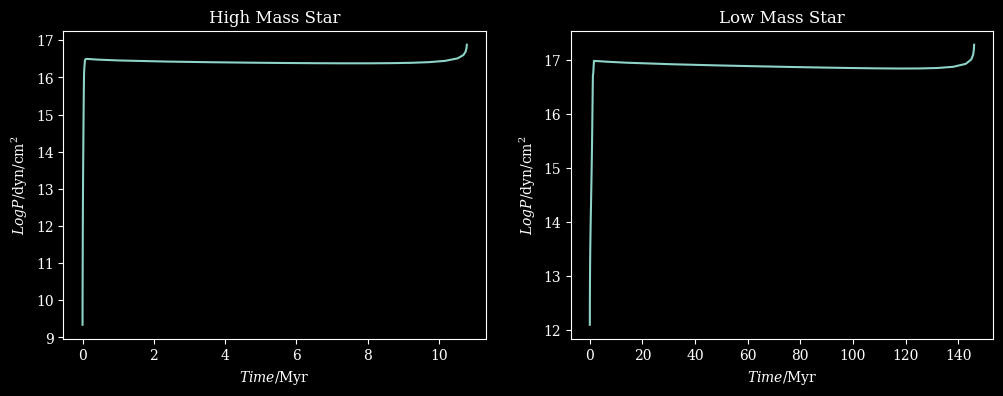

In [16]:
# Pressure

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax[0].plot((hist_high_mass.star_age/1e6), hist_high_mass.log_center_P)
ax[0].title.set_text('High Mass Star')
ax[0].set_xlabel('$Time /\mathrm{Myr}$')
ax[0].set_ylabel(r"$LogP/\mathrm{dyn/cm^2}$")

ax[1].plot((hist_low_mass.star_age/1e6), hist_low_mass.log_center_P)
ax[1].title.set_text('Low Mass Star')
ax[1].set_xlabel('$Time /\mathrm{Myr}$')
ax[1].set_ylabel(r"$LogP/\mathrm{dyn/cm^2}$")

The stars have different central pressures. Initially, the massive star has more density contibuting to high amounts of central pressure released in short amount of time. Over time, the pressure stabilizes with onset of equillibrium and decrease in density. With this decrease in density the pressure gets lower than low mass stars over time. Ergo, pressure and density are correlated. 

## Stellar Profiles

### Plot the log of central density as a function of radius

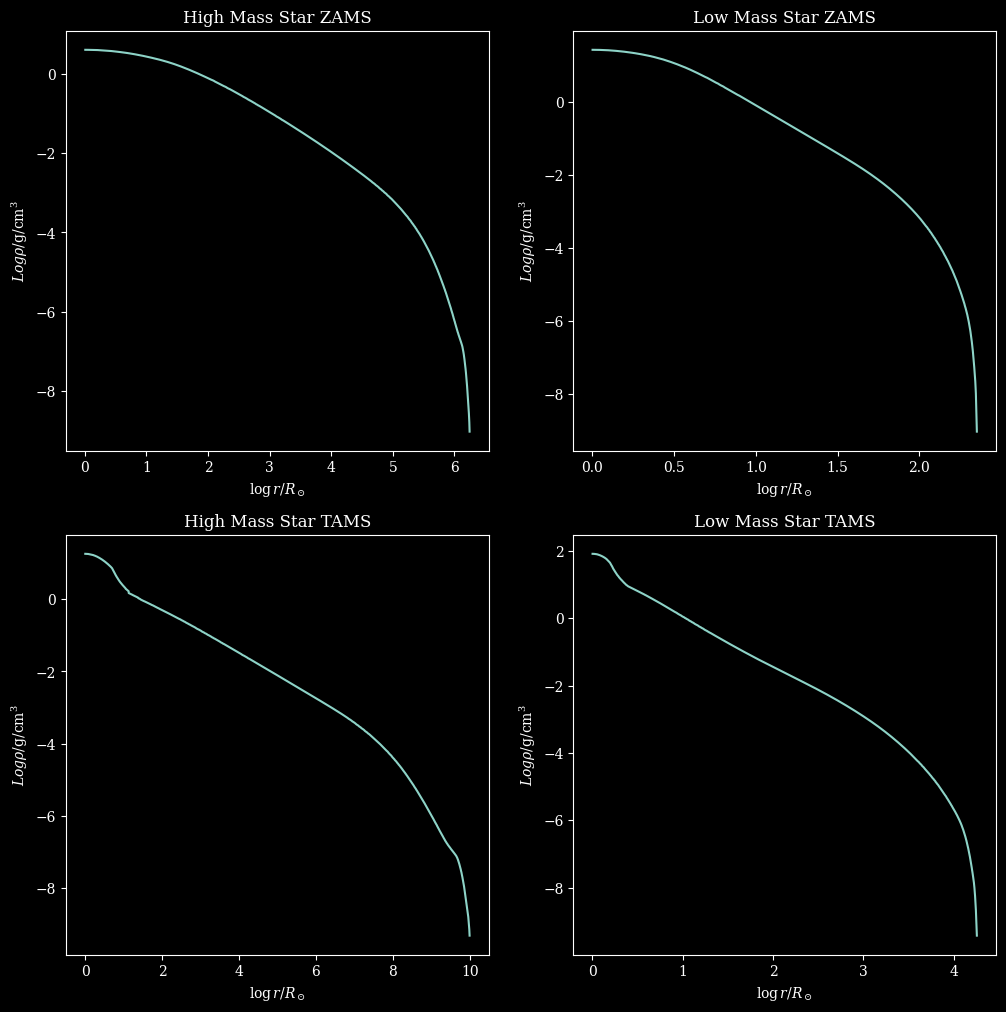

In [17]:
# log of the density as a function of radius
h = mr.MesaLogDir('high_mass/')
l = mr.MesaLogDir('low_mass/')
high_mass_zams_profile = h.profile_data(profile_number = 5)
low_mass_zams_profile = l.profile_data(profile_number = 5)

high_mass_tams_profile = h.profile_data(profile_number = 8)
low_mass_tams_profile = l.profile_data(profile_number = 7)

fig, ax = plt.subplots(2,2,figsize=(12,12))

# radius is set to (10 ** high_mass_zams_profile.logR) to remove the log term
ax[0][0].plot(10 ** high_mass_zams_profile.logR, high_mass_zams_profile.logRho) #plots in top left
ax[0][0].set_xlabel('$\log r/R_\odot$')
ax[0][0].set_ylabel(r"$Log\rho/\mathrm{g/cm^3}$")
ax[0][0].title.set_text('High Mass Star ZAMS')
ax[0][1].plot(10 ** low_mass_zams_profile.logR, low_mass_zams_profile.logRho) #plots in top right
ax[0][1].set_xlabel('$\log r/R_\odot$')
ax[0][1].set_ylabel(r"$Log\rho/\mathrm{g/cm^3}$")
ax[0][1].title.set_text('Low Mass Star ZAMS')
ax[1][0].plot(10 ** high_mass_tams_profile.logR, high_mass_tams_profile.logRho) #plots in bottom left
ax[1][0].set_xlabel('$\log r/R_\odot$')
ax[1][0].set_ylabel(r"$Log\rho/\mathrm{g/cm^3}$")
ax[1][0].title.set_text('High Mass Star TAMS')
ax[1][1].plot(10 ** low_mass_tams_profile.logR, low_mass_tams_profile.logRho) #plots in bottom right
ax[1][1].set_xlabel('$\log r/R_\odot$')
ax[1][1].set_ylabel(r"$Log\rho/\mathrm{g/cm^3}$")
ax[1][1].title.set_text('Low Mass Star TAMS')

In both the stars, the density decreases more rapidly with radius during TAMS indicating rapid expansion of core than during ZAMS. The stars have similar profiles at ZAMS, however the less massive star has a higher density at lower radius at the onset of ZAMS. At TAMS, the high mass star starts with a lower density than the low mass star at the current radius and decreases more rapidly with the radius than the low mass star. The slope of the plots are, however, similar for both samples at ZAMS and TAMS. 

### Plot the log of central temperature as a function of radius

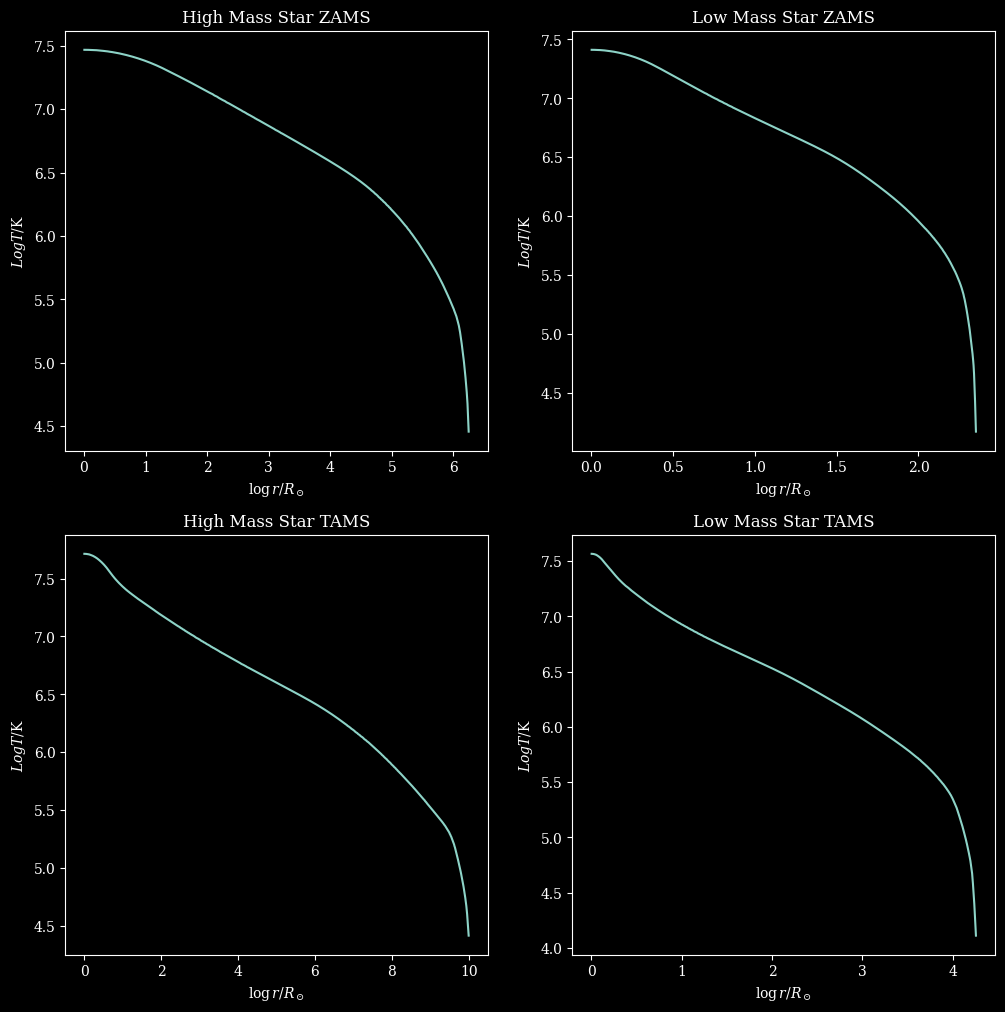

In [18]:
# log of the temperature as a function of radius
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].plot(10 ** high_mass_zams_profile.logR, high_mass_zams_profile.logT) #plots in top left
ax[0][0].set_xlabel('$\log r/R_\odot$')
ax[0][0].set_ylabel('$LogT/\mathrm{K}$')
ax[0][0].title.set_text('High Mass Star ZAMS')
ax[0][1].plot(10 ** low_mass_zams_profile.logR, low_mass_zams_profile.logT) #plots in top right
ax[0][1].set_xlabel('$\log r/R_\odot$')
ax[0][1].set_ylabel('$LogT/\mathrm{K}$')
ax[0][1].title.set_text('Low Mass Star ZAMS')
ax[1][0].plot(10 ** high_mass_tams_profile.logR, high_mass_tams_profile.logT) #plots in bottom left
ax[1][0].set_xlabel('$\log r/R_\odot$')
ax[1][0].set_ylabel('$LogT/\mathrm{K}$')
ax[1][0].title.set_text('High Mass Star TAMS')
ax[1][1].plot(10 ** low_mass_tams_profile.logR, low_mass_tams_profile.logT) #plots in bottom right
ax[1][1].set_xlabel('$\log r/R_\odot$')
ax[1][1].set_ylabel('$LogT/\mathrm{K}$')
ax[1][1].title.set_text('Low Mass Star TAMS')

The temperature falls more rapidly at TAMS than ZAMS with radius in both the star samples. Due to the larger radius, the high mass star temperature decreases faster than low mass star at ZAMS. At TAMS, the high mass star starts with a higher temperature than the low mass star and still decreases a bit faster than low mass star with radius. The slope of the plots are, however, similar for both samples at ZAMS and TAMS. 

### Plot the log of central pressure as a function of radius

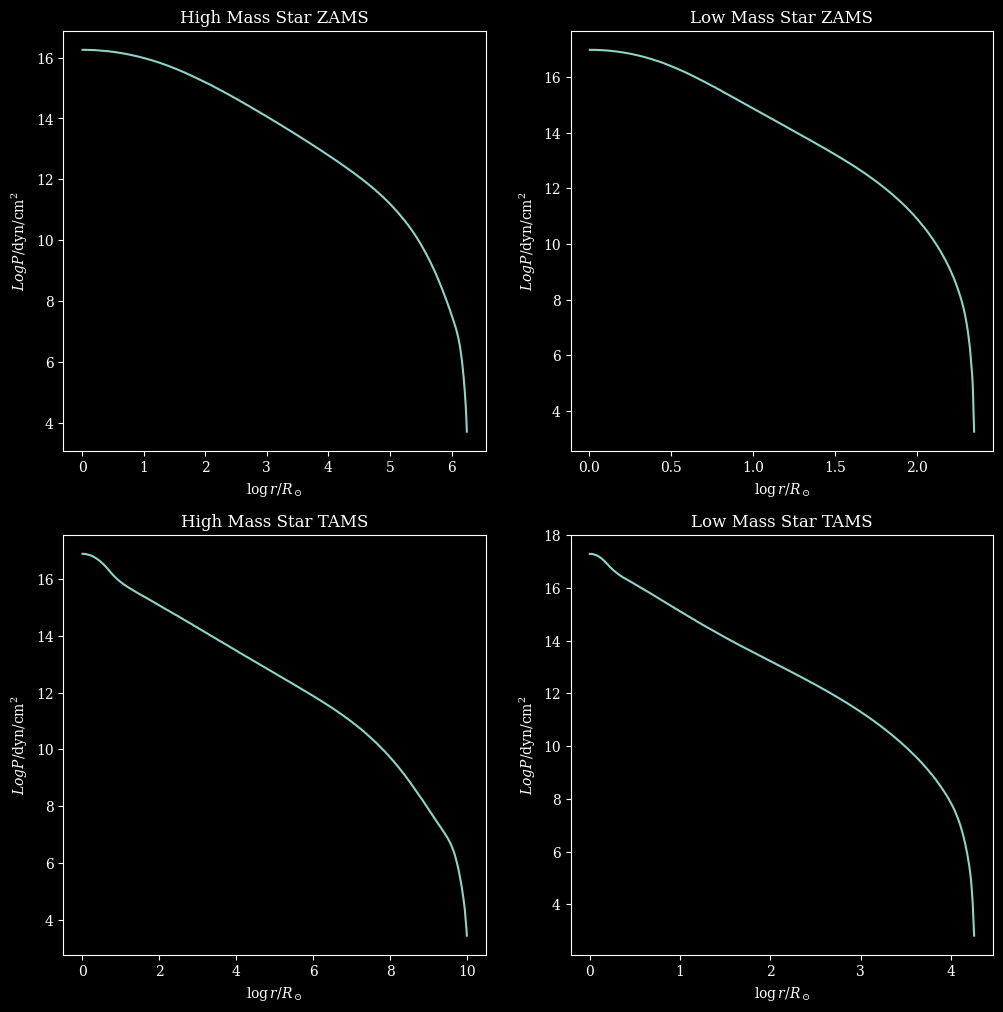

In [19]:
# log of the pressure as a function of radius
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].plot(10 ** high_mass_zams_profile.logR, high_mass_zams_profile.logP) #plots in top left
ax[0][0].set_xlabel('$\log r/R_\odot$')
ax[0][0].set_ylabel(r"$LogP/\mathrm{dyn/cm^2}$")
ax[0][0].title.set_text('High Mass Star ZAMS')
ax[0][1].plot(10 ** low_mass_zams_profile.logR, low_mass_zams_profile.logP) #plots in top right
ax[0][1].set_xlabel('$\log r/R_\odot$')
ax[0][1].set_ylabel(r"$LogP/\mathrm{dyn/cm^2}$")
ax[0][1].title.set_text('Low Mass Star ZAMS')
ax[1][0].plot(10 ** high_mass_tams_profile.logR, high_mass_tams_profile.logP) #plots in bottom left
ax[1][0].set_xlabel('$\log r/R_\odot$')
ax[1][0].set_ylabel(r"$LogP/\mathrm{dyn/cm^2}$")
ax[1][0].title.set_text('High Mass Star TAMS')
ax[1][1].plot(10 ** low_mass_tams_profile.logR, low_mass_tams_profile.logP) #plots in bottom right
ax[1][1].set_xlabel('$\log r/R_\odot$')
ax[1][1].set_ylabel(r"$LogP/\mathrm{dyn/cm^2}$")
ax[1][1].title.set_text('Low Mass Star TAMS')


Similar to central density profile the pressure falls more rapidly during TAMS than ZAMS. At ZAMS, the high mass star starts with a lower pressure than the low mass star and falls more quickly than the low mass star. At TAMS, the high mass star starts with a lower pressure than the low mass star and falls relatively faster with increase in radius than the low mass star. The slope of the plots are, however, similar for both samples at ZAMS and TAMS. 

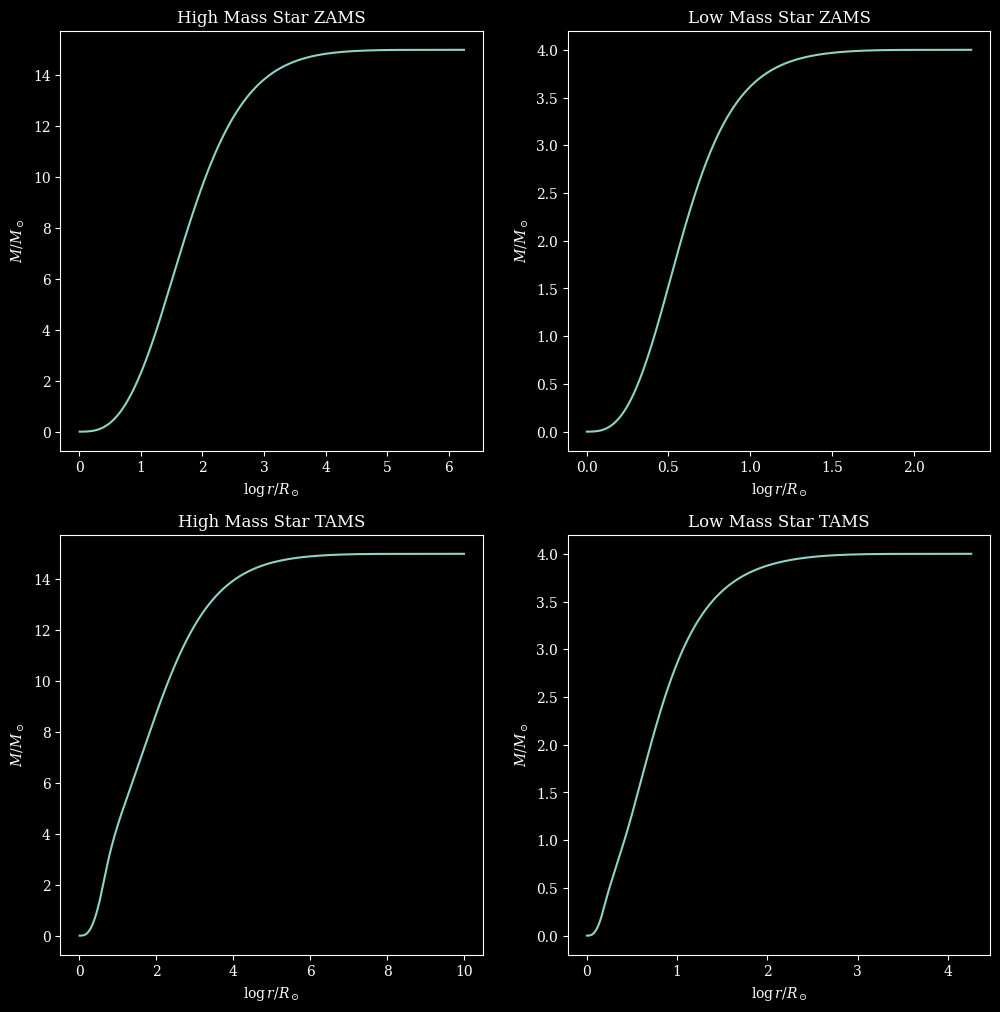

In [20]:
# mass as a function of radius
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].plot(10 ** high_mass_zams_profile.logR, high_mass_zams_profile.mass) #plots in top left
ax[0][0].set_xlabel('$\log r/R_\odot$')
ax[0][0].set_ylabel("$M/M_\odot$")
ax[0][0].title.set_text('High Mass Star ZAMS')
ax[0][1].plot(10 ** low_mass_zams_profile.logR, low_mass_zams_profile.mass) #plots in top right
ax[0][1].set_xlabel('$\log r/R_\odot$')
ax[0][1].set_ylabel("$M/M_\odot$")
ax[0][1].title.set_text('Low Mass Star ZAMS')
ax[1][0].plot(10 ** high_mass_tams_profile.logR, high_mass_tams_profile.mass) #plots in bottom left
ax[1][0].set_xlabel('$\log r/R_\odot$')
ax[1][0].set_ylabel("$M/M_\odot$")
ax[1][0].title.set_text('High Mass Star TAMS')
ax[1][1].plot(10 ** low_mass_tams_profile.logR, low_mass_tams_profile.mass) #plots in bottom right
ax[1][1].set_xlabel('$\log r/R_\odot$')
ax[1][1].set_ylabel("$M/M_\odot$")
ax[1][1].title.set_text('Low Mass Star TAMS')

Both star models displayed a steep increase in mass with increase in radius while going from ZAMS to TAMS. At ZAMS, the high mass star and the low mass star showed a similar slope with the high mass star hitting much more mass with much more radius. At TAMS, the models again showed a similar slope for both sample with the high mass star getting larger and more massive than the low mass star. 

### Plot the log of luminosity as a function of radius

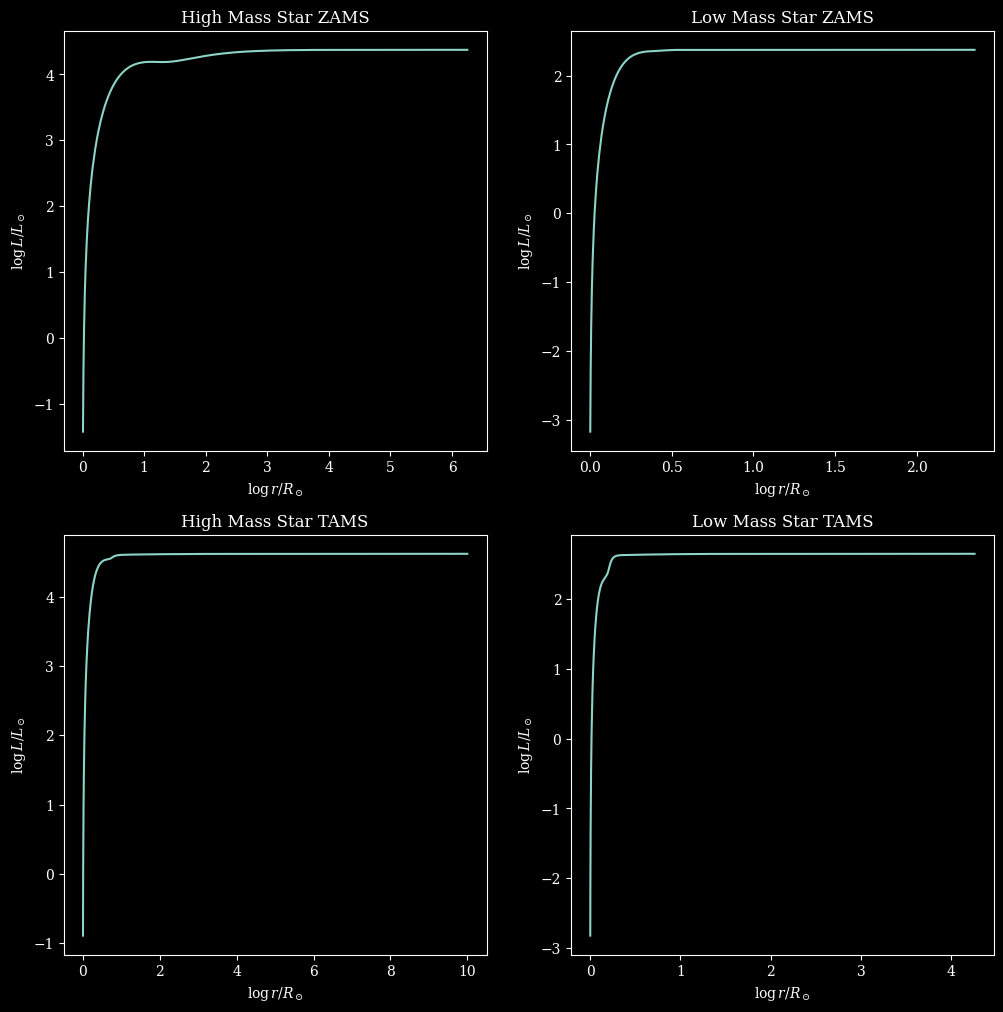

In [21]:
# log of the luminosity as a function of radius
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].plot(10 ** high_mass_zams_profile.logR, high_mass_zams_profile.logL) #plots in top left
ax[0][0].set_xlabel('$\log r/R_\odot$')
ax[0][0].set_ylabel('$\log L/L_\odot$')
ax[0][0].title.set_text('High Mass Star ZAMS')
ax[0][1].plot(10 ** low_mass_zams_profile.logR, low_mass_zams_profile.logL) #plots in top right
ax[0][1].set_xlabel('$\log r/R_\odot$')
ax[0][1].set_ylabel('$\log L/L_\odot$')
ax[0][1].title.set_text('Low Mass Star ZAMS')
ax[1][0].plot(10 ** high_mass_tams_profile.logR, high_mass_tams_profile.logL) #plots in bottom left
ax[1][0].set_xlabel('$\log r/R_\odot$')
ax[1][0].set_ylabel('$\log L/L_\odot$')
ax[1][0].title.set_text('High Mass Star TAMS')
ax[1][1].plot(10 ** low_mass_tams_profile.logR, low_mass_tams_profile.logL) #plots in bottom right
ax[1][1].set_xlabel('$\log r/R_\odot$')
ax[1][1].set_ylabel('$\log L/L_\odot$')
ax[1][1].title.set_text('Low Mass Star TAMS')

The profile for both star samples changed going from ZAMS to TAMS by getting more luminous with low change in radius indicated by the curve getting steeper in TAMS. They have similar curves at ZAMS and TAMS but at different scales. After reaching maxima, both the star samples at both ZAMS and TAMS, the luminosity stabilized for the rest of the radius. 

### Plot the temperature-adiabatic temperature ratio gradient and highlight radiative and convective zones

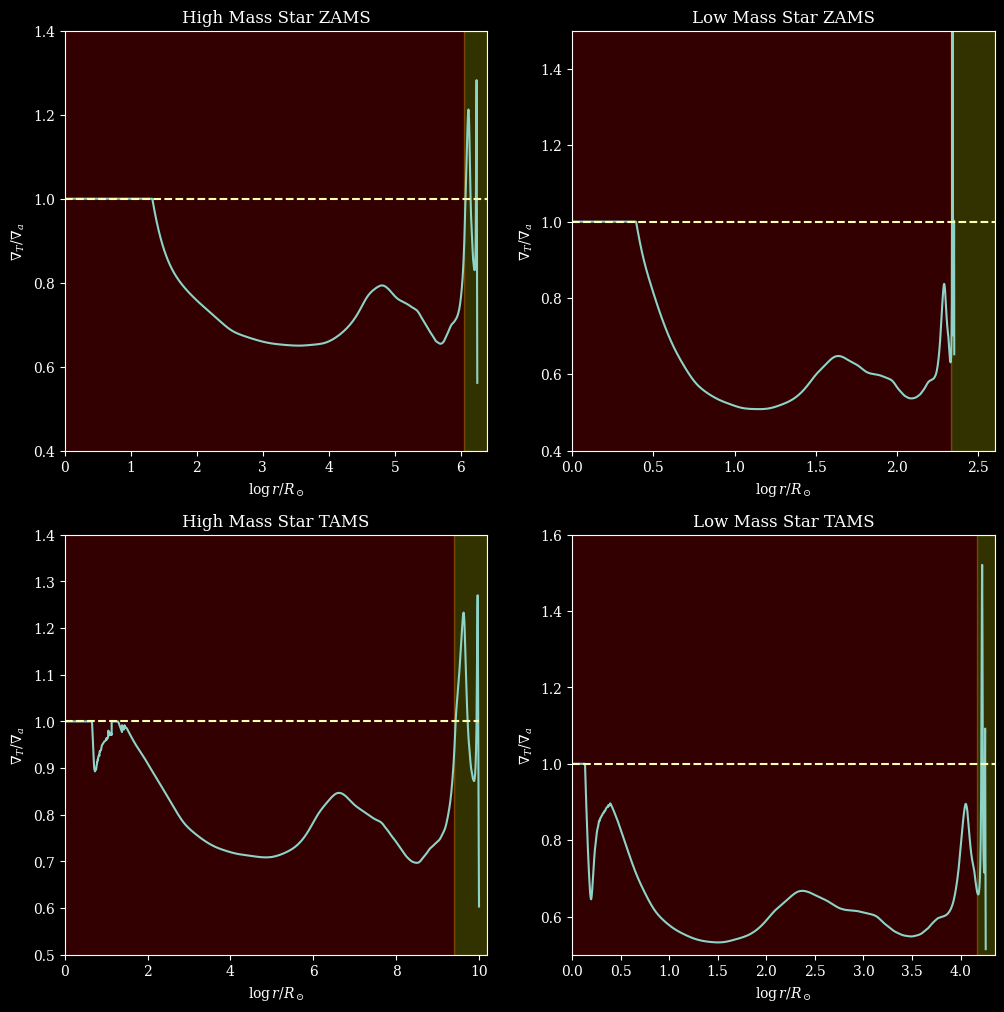

In [22]:
# gradT_div_grada
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].set_xlim([0, 6.4])
ax[0][0].set_ylim([0.4, 1.4])
ax[0][0].plot(10 ** high_mass_zams_profile.logR, high_mass_zams_profile.gradT_div_grada) #plots in top left
ax[0][0].plot([0, 2, 4, 6, 8, 10], [1,1,1,1,1,1], '--')
ax[0][0].set_xlabel('$\log r/R_\odot$')
ax[0][0].set_ylabel(r'$\nabla_{T} /\nabla_{a}$')
ax[0][0].title.set_text('High Mass Star ZAMS')
ax[0][0].axvspan(0, 6.05, alpha=0.2, label = 'radiative', color = 'red')
ax[0][0].axvspan(6.05, 6.4, alpha=0.2, label = 'convective', color = 'yellow')
ax[0][0].axvspan(3, 3, facecolor='g', alpha=1)


ax[0][1].set_xlim([0, 2.6])
ax[0][1].set_ylim([0.4, 1.5])
ax[0][1].plot(10 ** low_mass_zams_profile.logR, low_mass_zams_profile.gradT_div_grada) #plots in top right
ax[0][1].plot([0, 2, 4, 6, 8, 10], [1,1,1,1,1,1], '--')
ax[0][1].set_xlabel('$\log r/R_\odot$')
ax[0][1].set_ylabel(r'$\nabla_{T} /\nabla_{a}$')
ax[0][1].title.set_text('Low Mass Star ZAMS')
ax[0][1].axvspan(0, 2.33, alpha=0.2, label = 'radiative', color = 'red')
ax[0][1].axvspan(2.33, 2.6, alpha=0.2, label = 'convective', color = 'yellow')


ax[1][0].set_xlim([0, 10.2])
ax[1][0].set_ylim([0.5, 1.4])
ax[1][0].plot(10 ** high_mass_tams_profile.logR, high_mass_tams_profile.gradT_div_grada) #plots in bottom left
ax[1][0].plot([0, 2, 4, 6, 8, 10], [1,1,1,1,1,1], '--')
ax[1][0].set_xlabel('$\log r/R_\odot$')
ax[1][0].set_ylabel(r'$\nabla_{T} /\nabla_{a}$')
ax[1][0].title.set_text('High Mass Star TAMS')
ax[1][0].axvspan(0, 9.4, alpha=0.2, label = 'radiative', color = 'red')
ax[1][0].axvspan(9.4, 10.2, alpha=0.2, label = 'convective', color = 'yellow')


ax[1][1].set_xlim([0, 4.35])
ax[1][1].set_ylim([0.5, 1.6])
ax[1][1].plot(10 ** low_mass_tams_profile.logR, low_mass_tams_profile.gradT_div_grada) #plots in bottom right
ax[1][1].plot([0, 2, 4, 6, 8, 10], [1,1,1,1,1,1], '--')
ax[1][1].set_xlabel('$\log r/R_\odot$')
ax[1][1].set_ylabel(r'$\nabla_{T} /\nabla_{a}$')
ax[1][1].title.set_text('Low Mass Star TAMS')
ax[1][1].axvspan(0, 4.17, alpha=0.2, label = 'radiative', color = 'red')
ax[1][1].axvspan(4.17, 4.35, alpha=0.2, label = 'convective', color = 'yellow')

Convective is defined by temperature gradient going steeper than the adiabetic temperature gradient. Mathematically,

![svg image](./grad.svg)

Convective zone in the plot starts when the temperature gradient is larger than adiabetic temperature gradient.

This zone is marked by the yellow shaded portion of the plots and the radiative zone is marked by the red shaded area. The dotted line shows the adiabatic gradient.  
The radiative zone (radius) increased going from ZAMS to TAMS in the high mass star while it decreased in the low mass star. At both ZAMS and TAMS, the high mass star has a greater radiative zone than the low mass star. The star models do not have similar profiles for the temperature gradient ratios. However, they have similar curves for each type of star going from ZAMS to TAMS. 